In [ ]:
# Import libraries yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset (asumsi file 'CitarumWater.csv' tersedia)
df = pd.read_csv('CitarumWater.csv')

In [ ]:
# Display the first few rows and the info to check for any target column or missing data
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB


(   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
 0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
 1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
 2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
 3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
 4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   
 
      DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
 0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
 1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
 2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
 3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
 4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  ,
 None,
                No           pH          TSS           DO          BOD  \
 count  2500.00000  25

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Drop columns that are non-numeric or not relevant
df_citarum_cleaned = df.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'O2'])

# Handle missing or non-numeric values
# No missing values detected in numeric columns from previous checks

# Split dataset into features (X) and target (y)
X = df_citarum_cleaned.drop(columns=['Class'])
y = df_citarum_cleaned['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, confusion_mat


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.922,
 '              precision    recall  f1-score   support\n\n           1       0.91      0.89      0.90       196\n           2       0.93      0.94      0.94       294\n           3       0.86      1.00      0.92         6\n           4       1.00      0.75      0.86         4\n\n    accuracy                           0.92       500\n   macro avg       0.92      0.90      0.90       500\nweighted avg       0.92      0.92      0.92       500\n',
 array([[175,  21,   0,   0],
        [ 17, 277,   0,   0],
        [  0,   0,   6,   0],
        [  0,   0,   1,   3]]))

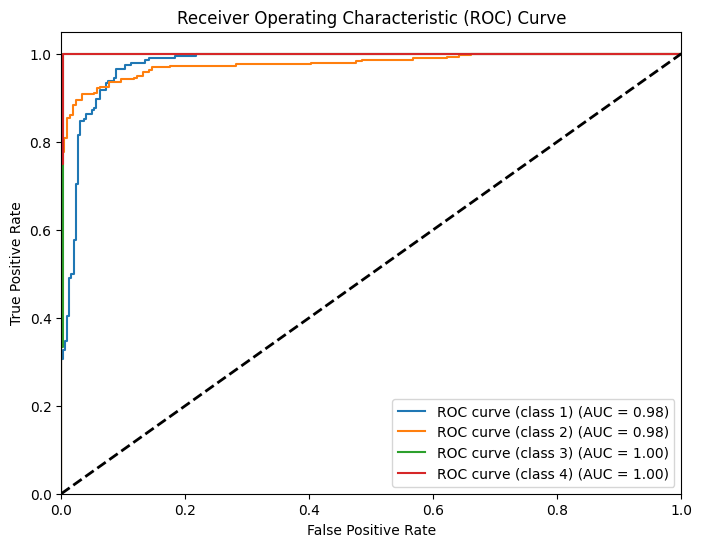

{0: 0.9770408163265306,
 1: 0.9774123241529621,
 2: 0.9986504723346828,
 3: 0.9994959677419354}

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Binarize the output for multi-class AUC and ROC (one-vs-rest approach)
from sklearn.preprocessing import label_binarize

# Binarize the target labels for calculating AUC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Compute probabilities for ROC curve and AUC
y_score = log_reg.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i+1}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

roc_auc

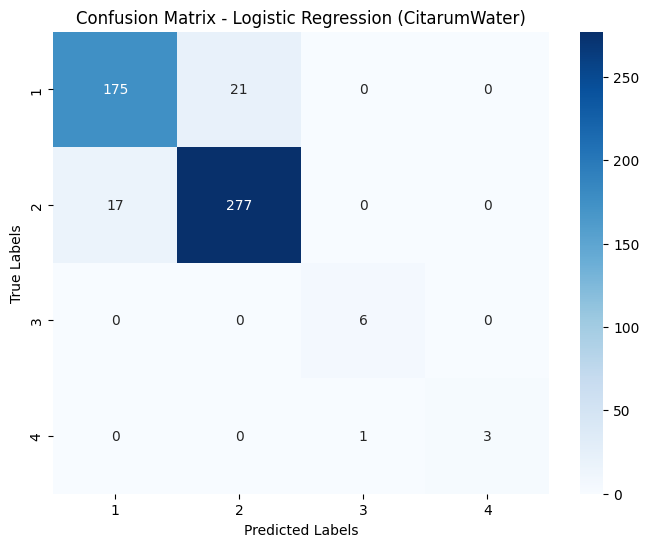

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion Matrix - Logistic Regression (CitarumWater)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# Print the classification report
classification_report_str = classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

     Class 1       0.91      0.89      0.90       196
     Class 2       0.93      0.94      0.94       294
     Class 3       0.86      1.00      0.92         6
     Class 4       1.00      0.75      0.86         4

    accuracy                           0.92       500
   macro avg       0.92      0.90      0.90       500
weighted avg       0.92      0.92      0.92       500

